/Users/salome/Downloads/radio-astro-scripts/Spiral arms/main_functions.py:388: RuntimeWarning: invalid value encountered in log10
  nh[i][j]=log10(nhT)
/Users/salome/Downloads/radio-astro-scripts/Spiral arms/main_functions.py:388: RuntimeWarning: divide by zero encountered in log10
  nh[i][j]=log10(nhT)
/Users/salome/Downloads/radio-astro-scripts/Spiral arms/main_functions.py:365: RuntimeWarning: invalid value encountered in sqrt
  S2plus[i][j]=np.sqrt(R2[i][j]**2-R0**2*np.sin(np.radians(l[i][j]))**2)+R0*np.cos(np.radians(l[i][j]))
/Users/salome/Downloads/radio-astro-scripts/Spiral arms/main_functions.py:366: RuntimeWarning: invalid value encountered in sqrt
  S2moins[i][j]=-np.sqrt(R2[i][j]**2-R0**2*np.sin(np.radians(l[i][j]))**2)+R0*np.cos(np.radians(l[i][j]))
/Users/salome/Downloads/radio-astro-scripts/Spiral arms/main_functions.py:386: RuntimeWarning: divide by zero encountered in double_scalars
  nhT=NH[i][j]/D[i][j]


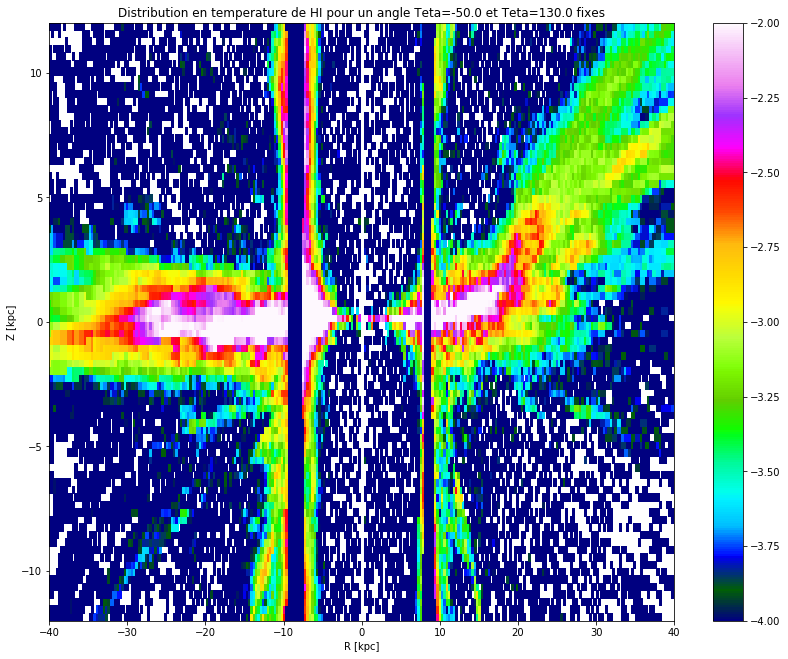

In [1]:
from main_functions import *
from astropy.io import fits

#warnings.filterwarnings('ignore')
%matplotlib inline

#
target_url = 'http://cdsarc.u-strasbg.fr/viz-bin/nph-Cat?-plus=-%2b&VIII/76/lab.fit'
hdulist = fits.open(target_url)

prihdr=hdulist[0].header
data2=hdulist[0].data
#
rmin=-40. #borne inferieure de l'intervalle sur l'axe des abscisses
rmax=40. #borne superieure
rincr=0.3 #pas sur l'axe des abscisses
zmin=-12. #borne inferieure de l'intervalle sur l'axe des ordonnees
zmax=12. #borne superieure
zincr=0.3 #pas sur l'axe des ordonnees
TETA=130. #valeur de l'angle auquel on regarde
dV=1.
#
r1=arange(rmin,0.001,rincr)
r2=arange(0.,rmax+0.001,rincr)
z=arange(zmin,zmax+0.001,zincr)
R1,Z = np.meshgrid(r1,z)
R2,Z = np.meshgrid(r2,z)
#
A,B=milkyway_teta(rmin,rmax,rincr,TETA,zmin,zmax,zincr,dV,data2,prihdr) #appel de la fonction qui donne le plot dans un plan orthogonal a l'axe des TETA
#
plt.figure(1,figsize=(14,11))
a=plt.pcolormesh(R1,Z,A,vmin=-4,vmax=-2, cmap='gist_ncar') # si on ne veut pas d'interpolation
plt.pcolormesh(R2,Z,B,vmin=-4,vmax=-2, cmap='gist_ncar')
#plt.figure(0)
#a=plt.imshow(A, interpolation='bicubic', origin='lower', extent=[rmin,0,zmin,zmax],vmin=-4,vmax=-2) # plot avec interpolation
#plt.figure(1)
#b=plt.imshow(B, interpolation='bicubic', origin='lower', extent=[0,rmax,zmin,zmax],vmin=-4,vmax=-2)
plt.xlabel('R [kpc]')
plt.ylabel('Z [kpc]')
plt.ylim(zmin,zmax)
plt.xlim(rmin,rmax)
plt.title('Distribution en temperature de HI pour un angle Teta='+str(TETA-180)+' et Teta='+str(TETA)+' fixes')
plt.colorbar(a)
#plt.colorbar(b)
plt.show() 